# Find a Solution Set using Multi-objective Optimization
[https://pymoo.org/getting_started/part_2.html](https://pymoo.org/getting_started/part_2.html)
## Implement the problem

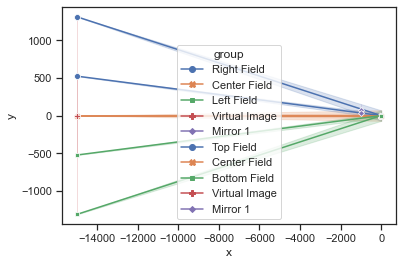

In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

from volume import TotalMechanicalVolumeOfHUD, MirrorFullHeight
from surplus_value import SurplusValue

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=7,
                        n_obj=2,
                        n_constr=1,
                        xl=np.array([5,2,10000,500,70,30,15]),
                        xu=np.array([15,6,30000,1500,210,90,45]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = TotalMechanicalVolumeOfHUD({
                "FullHorizontalFOV" : x[0],
                "FullVerticalFOV" : x[1],
                "VirtualImageDistance" : x[2],
                "EyeboxToMirror1" : x[3],
                "EyeboxFullWidth" : x[4],
                "EyeboxFullHeight" : x[5],
                "Mirror1ObliquityAngle" : x[6],
                "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
                "MechanicalVolumeIncrease" : 40,
                "M1M2OverlapFraction" : 0,
                "PGUVolumeEstimate" : 0.5})
        # f2 has to be negative to maximize the value
        f2 = - SurplusValue(
            x[0],
            x[1],
            MirrorFullHeight({
                "FullHorizontalFOV" : x[0],
                "FullVerticalFOV" : x[1],
                "VirtualImageDistance" : x[2],
                "EyeboxToMirror1" : x[3],
                "EyeboxFullWidth" : x[4],
                "EyeboxFullHeight" : x[5],
                "Mirror1ObliquityAngle" : x[6],
                "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
                "MechanicalVolumeIncrease" : 40,
                "M1M2OverlapFraction" : 0,
                "PGUVolumeEstimate" : 0.5}),
            TotalMechanicalVolumeOfHUD({
                "FullHorizontalFOV" : x[0],
                "FullVerticalFOV" : x[1],
                "VirtualImageDistance" : x[2],
                "EyeboxToMirror1" : x[3],
                "EyeboxFullWidth" : x[4],
                "EyeboxFullHeight" : x[5],
                "Mirror1ObliquityAngle" : x[6],
                "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
                "MechanicalVolumeIncrease" : 40,
                "M1M2OverlapFraction" : 0,
                "PGUVolumeEstimate" : 0.5}),
        )

        # g1 has to be negative to make the volume constraint >= 0
        g1 = - TotalMechanicalVolumeOfHUD({
                "FullHorizontalFOV" : x[0],
                "FullVerticalFOV" : x[1],
                "VirtualImageDistance" : x[2],
                "EyeboxToMirror1" : x[3],
                "EyeboxFullWidth" : x[4],
                "EyeboxFullHeight" : x[5],
                "Mirror1ObliquityAngle" : x[6],
                "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
                "MechanicalVolumeIncrease" : 40,
                "M1M2OverlapFraction" : 0,
                "PGUVolumeEstimate" : 0.5})
        # g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1]


problem = MyProblem()

## Initialize an Algorithm

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=400,
    n_offsprings=100,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

## Define a Termination Criterion

In [3]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 400)

## Optimize

In [4]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     400 |  0.00000E+00 |  0.00000E+00 |      12 |            - |            -
    2 |     500 |  0.00000E+00 |  0.00000E+00 |      12 |  0.008251252 |        ideal
    3 |     600 |  0.00000E+00 |  0.00000E+00 |      11 |  0.021217633 |        ideal
    4 |     700 |  0.00000E+00 |  0.00000E+00 |      15 |  0.059868006 |        ideal
    5 |     800 |  0.00000E+00 |  0.00000E+00 |      14 |  0.028015804 |        ideal
    6 |     900 |  0.00000E+00 |  0.00000E+00 |      15 |  0.036686967 |            f
    7 |    1000 |  0.00000E+00 |  0.00000E+00 |      16 |  0.012224835 |        nadir
    8 |    1100 |  0.00000E+00 |  0.00000E+00 |      16 |  0.003628697 |        ideal
    9 |    1200 |  0.00000E+00 |  0.00000E+00 |      18 |  0.039057622 |        ideal
   10 |    1300 |  0.00000E+00 |  0.00000E+00 |      20 |  0.007826349 |            f
   11 |    1400 |  0.00000E+00 |  0.00000E+00 |      2

## Visualize

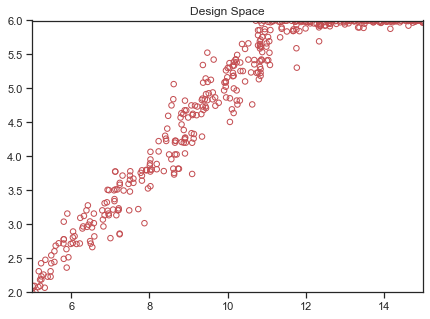

In [5]:
import matplotlib.pyplot as plt
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

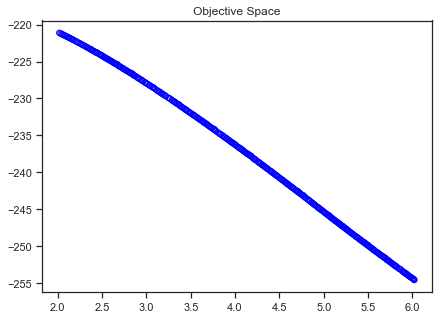

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

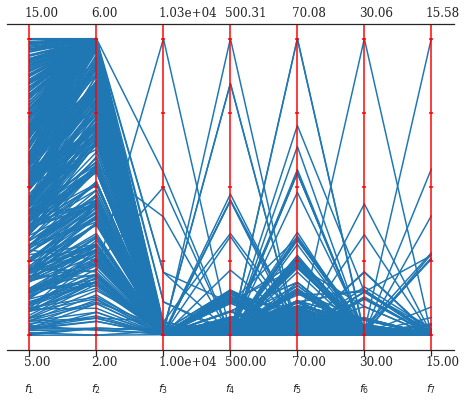

In [7]:
from pymoo.visualization.pcp import PCP
PCP().add(X).show()

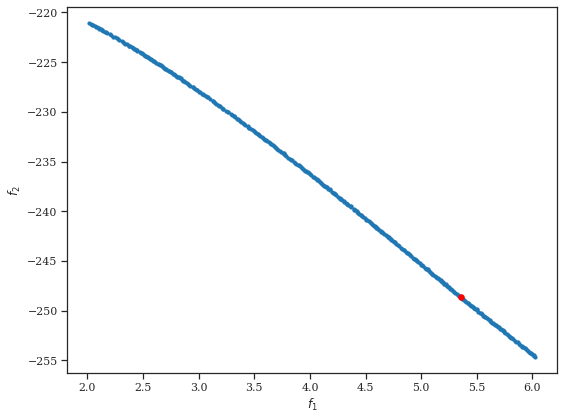

In [8]:
from pymoo.visualization.scatter import Scatter

plot = Scatter(tight_layout=True)
plot.add(F, s=10)
plot.add(F[10], s=30, color="red")
plot.show()

In [9]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video

# use the video writer as a resource
with Recorder(Video("ga.mp4",fps=30)) as rec:

    # for each algorithm object in the history
    for entry in res.history:
        sc = Scatter(title=("Gen %s" % entry.n_gen))
        sc.add(entry.pop.get("F"))
        sc.add(entry.problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
        sc.do()

        # finally record the current visualization to the video
        rec.record()

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X, columns = ['FullHorizontalFOV',
                                    'FullVerticalFOV',
                                    'VirtualImageDistance',
                                    'EyeboxToMirror1',
                                    'EyeboxFullWidth',
                                    'EyeboxFullHeight',
                                    'Mirror1ObliquityAngle'])

df.head()

,FullHorizontalFOV,FullVerticalFOV,VirtualImageDistance,EyeboxToMirror1,EyeboxFullWidth,EyeboxFullHeight,Mirror1ObliquityAngle
0,14.999187,5.999555,10000.096334,500.000022,70.007090,30.000241,15.000053
1,5.000513,2.000719,10000.547364,500.006070,70.000516,30.000429,15.000113
2,7.809224,3.794904,10000.013059,500.000834,70.002076,30.001416,15.001641
3,8.027163,4.067481,10000.092566,500.012792,70.000478,30.000902,15.000226
4,9.385184,4.683900,10000.298466,500.036300,70.001022,30.000404,15.000871


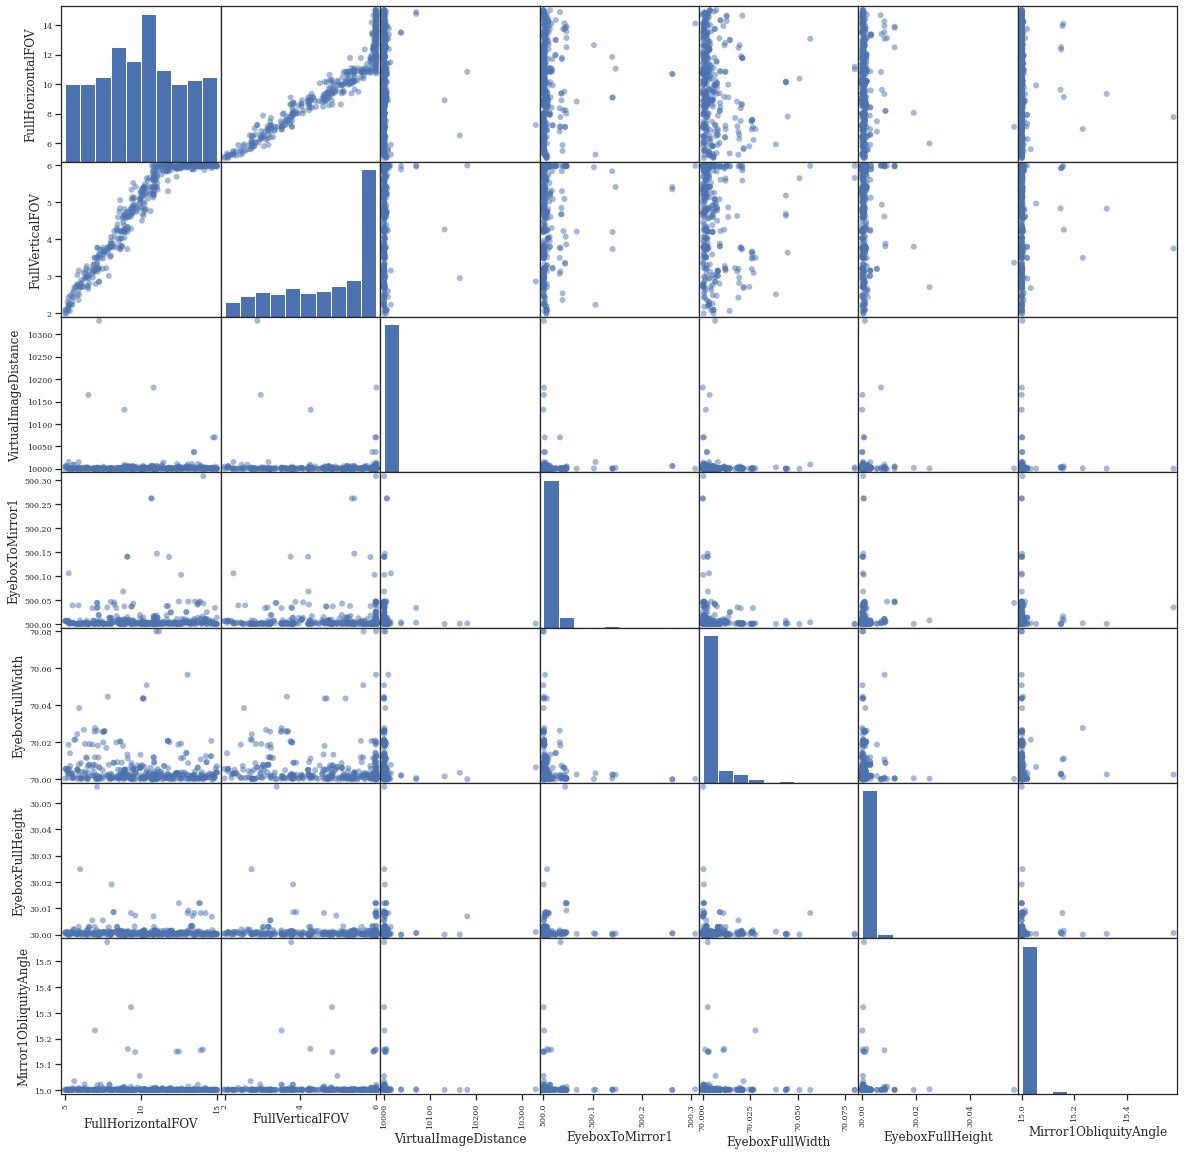

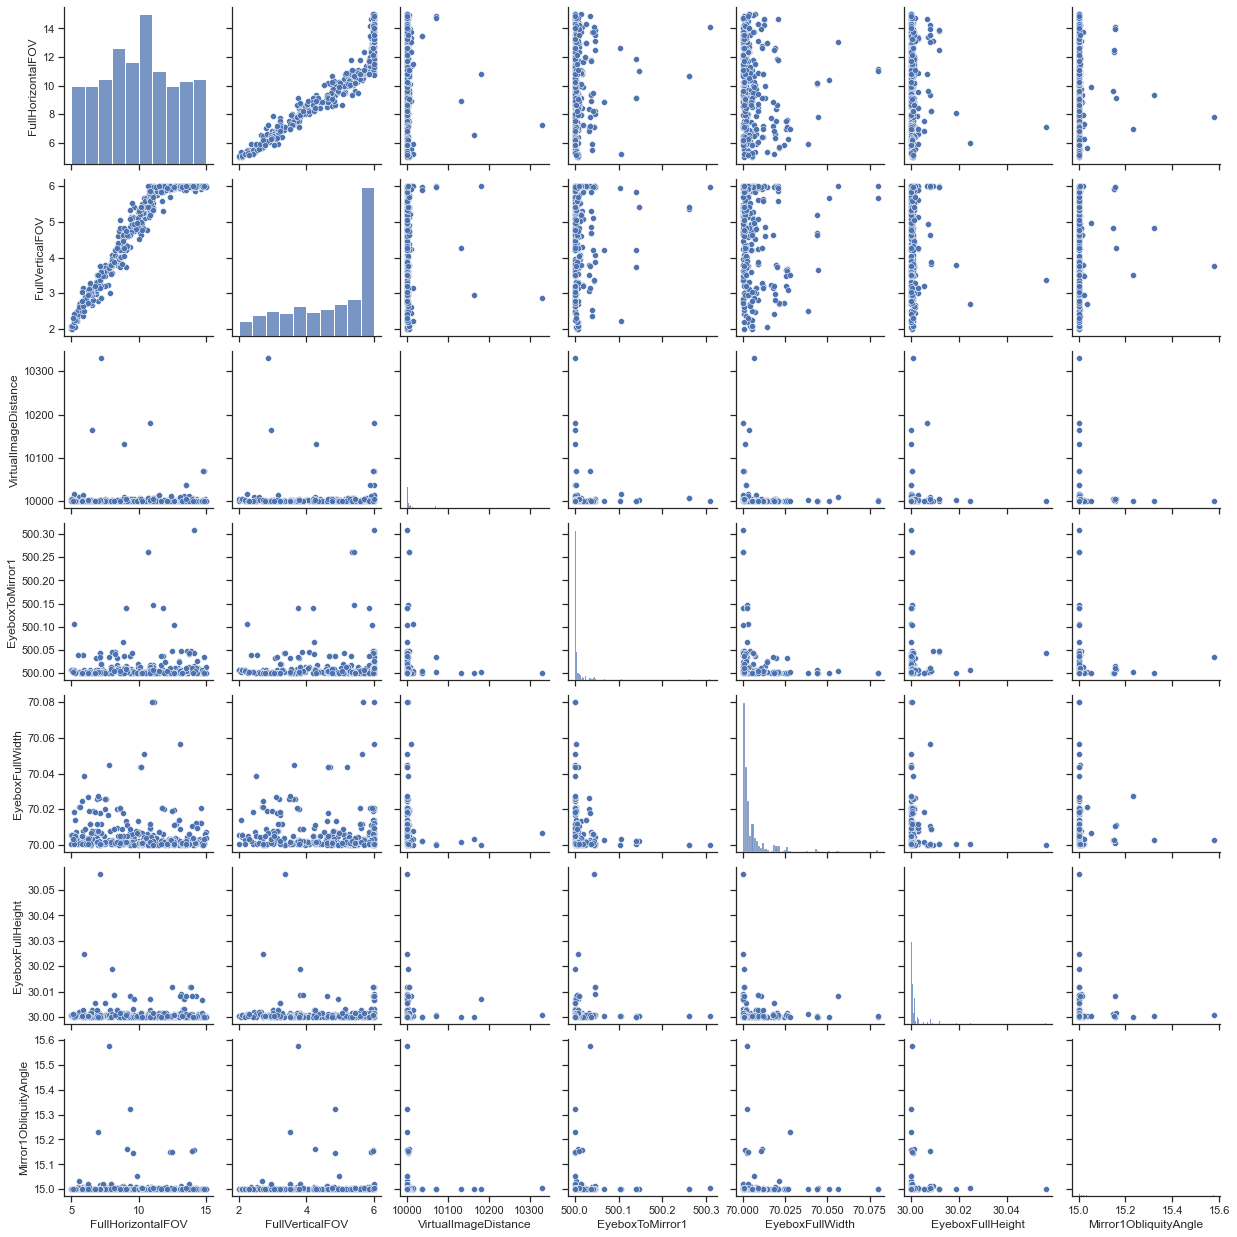

In [11]:
# plot scatter matrix using pandas and matplotlib
pd.plotting.scatter_matrix(df,figsize=(20,20),grid=True, marker='o')

# plot scatter matrix using seaborn
sns.set_theme(style="ticks")
sns.pairplot(df)

In [14]:
len(F[0])

2